<a href="https://colab.research.google.com/github/SamuelT57/Tweet_Classifier/blob/main/Tweet_Classsifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Download helper functions script
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2023-08-07 19:05:01--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-08-07 19:05:01 (69.2 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [3]:
# Import series of helper functions for the notebook
from helper_functions import unzip_data, create_tensorboard_callback, plot_loss_curves, compare_historys

##get text dataset

In [4]:
# Download data (same as from Kaggle)
!wget "https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip"

# Unzip data
unzip_data("nlp_getting_started.zip")

--2023-08-07 19:05:03--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.99.128, 142.250.107.128, 74.125.20.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.99.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip’

nlp_getting_started 100%[===================>] 593.11K  --.-KB/s    in 0.008s  

2023-08-07 19:05:03 (70.0 MB/s) - ‘nlp_getting_started.zip’ saved [607343/607343]



In [5]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
train_df

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [6]:
test_df

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...


In [7]:
train_df_shuffled = train_df.sample(frac = 1, random_state = 42)
train_df_shuffled.head()

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


In [8]:
train_df.target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [9]:
len(train_df), len(test_df)

(7613, 3263)

In [10]:
# Let's visualize some random training examples
import random
random_index = random.randint(0, len(train_df)-5) # create random indexes not higher than the total number of samples
for row in train_df_shuffled[["text", "target"]][random_index:random_index+5].itertuples():
  _, text, target = row
  print(f"Target: {target}", "(real disaster)" if target > 0 else "(not real disaster)")
  print(f"Text:\n{text}\n")
  print("---\n")

Target: 1 (real disaster)
Text:
1/2 of the deaths in red-light running crashes are pedestrians bicyclists &amp; other vehicle occupants that are hit by the red-light runners.

---

Target: 1 (real disaster)
Text:
WWII Memories Plus Lessons of Hiroshima We Still Need Nuclear Weapons http://t.co/xbMm7ITe9q #denver #billings #rapidcity #seattle #cheyenne

---

Target: 0 (not real disaster)
Text:
#NowPlaying * Cliff Richard - I Could Easily Fall (In Love With You) (&amp; Shadows) * #Internet #Nieuws #Radio On http://t.co/8LkMWp9qzw

---

Target: 1 (real disaster)
Text:
DISASTER AVERTED: Police kill gunman with 'hoax device' at cinema http://t.co/tdHn9zy0ER  via #Foxnews

---

Target: 1 (real disaster)
Text:
Whirlwind Medusa Audio Snake: 16 microphone inputs 0 returns 150 ft http://t.co/mxkAlMQpdb http://t.co/8KZnhtYtt9

---



In [11]:
from sklearn.model_selection import train_test_split

In [12]:
from sklearn.model_selection import train_test_split

# Use train_test_split to split training data into training and validation sets
train_sentences, val_sentences, train_labels, val_labels = train_test_split(train_df_shuffled["text"].to_numpy(),
                                                                            train_df_shuffled["target"].to_numpy(),
                                                                            test_size=0.1, # dedicate 10% of samples to validation set
                                                                            random_state=42) # random state for reproducibility

In [13]:
# Check the lengths
len(train_sentences), len(train_labels), len(val_sentences), len(val_labels)

(6851, 6851, 762, 762)

In [14]:
train_sentences[:10], train_labels[:10]

(array(['@mogacola @zamtriossu i screamed after hitting tweet',
        'Imagine getting flattened by Kurt Zouma',
        '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
        "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
        'Somehow find you and I collide http://t.co/Ee8RpOahPk',
        '@EvaHanderek @MarleyKnysh great times until the bus driver held us hostage in the mall parking lot lmfao',
        'destroy the free fandom honestly',
        'Weapons stolen from National Guard Armory in New Albany still missing #Gunsense http://t.co/lKNU8902JE',
        '@wfaaweather Pete when will the heat wave pass? Is it really going to be mid month? Frisco Boy Scouts have a canoe trip in Okla.',
        'Patient-reported outcomes in long-term survivors of metastatic colorectal cancer - British Journal of Surgery http://t.co/5Yl4DC1Tqt'],
       dtype=object),
 array([0,

In [15]:
##Text vectorization (tokenization)
from tensorflow.keras.layers import TextVectorization

text_vectorizer = tf.keras.layers.TextVectorization(max_tokens=None,  #number of words in vocab
                                                    standardize='lower_and_strip_punctuation',
                                                    split='whitespace',
                                                    ngrams=None, #groups of n-words
                                                    output_mode='int', # how to map tokens to numbers
                                                    output_sequence_length=None, #how long do you want your sequences to be
                                                )

In [16]:
#find average num of tokens in training tweet
len(train_sentences[0].split())

7

In [17]:
#setup vecotrization variables
max_vocab_length = 10000 #max num of words in vocab
max_length = 15 # max length of squences

text_vectorizer = TextVectorization(max_tokens = max_vocab_length, output_mode = "int", output_sequence_length= max_length)

In [18]:
#fit text_vectorizer to training text
text_vectorizer.adapt(train_sentences)

In [19]:
sample_sentence = "There's a flood in my street!"
text_vectorizer([sample_sentence])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[264,   3, 232,   4,  13, 698,   0,   0,   0,   0,   0,   0,   0,
          0,   0]])>

In [20]:
random_sentence = random.choice(train_sentences)
print(f"Original text:\n {random_sentence}\
\n\nVectorized version:")
text_vectorizer([random_sentence])

Original text:
 No UK train accident fatalities for 8th year running despite 4% increase in passenger journeys http://t.co/SuiLzS2S95 @healthandsafety

Vectorized version:


<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[  40,  915,  119,  128,  301,   10, 6299,  183,  876, 3933,  178,
        5374,    4, 2810,    1]])>

In [21]:
# Get the unique words in the vocabulary
words_in_vocab = text_vectorizer.get_vocabulary()
top_5_words = words_in_vocab[:5] # most common tokens (notice the [UNK] token for "unknown" words)
bottom_5_words = words_in_vocab[-5:] # least common tokens
print(f"Number of words in vocab: {len(words_in_vocab)}")
print(f"Top 5 most common words: {top_5_words}")
print(f"Bottom 5 least common words: {bottom_5_words}")

Number of words in vocab: 10000
Top 5 most common words: ['', '[UNK]', 'the', 'a', 'in']
Bottom 5 least common words: ['pages', 'paeds', 'pads', 'padres', 'paddytomlinson1']


In [22]:
from tensorflow.keras import layers
embedding = layers.Embedding(input_dim = max_vocab_length,
                             output_dim = 128,
                             embeddings_initializer = "uniform",
                             input_length = max_length)
embedding

In [23]:
# Get a random sentence from training set
random_sentence = random.choice(train_sentences)
print(f"Original text:\n{random_sentence}\
      \n\nEmbedded version:")

# Embed the random sentence (turn it into numerical representation)
sample_embed = embedding(text_vectorizer([random_sentence]))
sample_embed

Original text:
But even if the stars and moon collide I never want you back into my life??????.      

Embedded version:


<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[-0.01741066,  0.00623818,  0.04399058, ..., -0.04482388,
         -0.02183336,  0.01381644],
        [-0.03813314,  0.004623  ,  0.02664808, ..., -0.00937307,
         -0.00140584,  0.01139615],
        [-0.02372835, -0.03667513,  0.03696297, ...,  0.04959781,
          0.02710824,  0.02915618],
        ...,
        [-0.00121163, -0.02493514, -0.02840686, ...,  0.02099056,
         -0.03160878, -0.04962161],
        [ 0.00658965,  0.03948576, -0.04814586, ..., -0.03140719,
          0.03005881,  0.00736611],
        [ 0.03908649,  0.0364162 ,  0.00607916, ...,  0.00717087,
         -0.00997093, -0.02213906]]], dtype=float32)>

In [24]:
sample_embed[0][0], sample_embed[0][0].shape

(<tf.Tensor: shape=(128,), dtype=float32, numpy=
 array([-0.01741066,  0.00623818,  0.04399058,  0.01561792,  0.01372099,
         0.00496138,  0.02295948, -0.01524758, -0.02522489,  0.02009142,
         0.04711542, -0.03336709,  0.02595881, -0.005724  , -0.00557214,
         0.01211176, -0.0396092 ,  0.0326382 ,  0.02405722, -0.04091404,
         0.02442862,  0.00741629, -0.04969648, -0.01684538,  0.02211822,
         0.02651359, -0.04310948,  0.03267871,  0.03645588,  0.04962716,
        -0.03996277,  0.03167719,  0.0415931 , -0.02422205, -0.03667865,
         0.035512  ,  0.00466276,  0.03664109,  0.03182175,  0.01339784,
        -0.01104637, -0.00828708,  0.04121495,  0.00209792,  0.00706297,
        -0.01050971,  0.04257387, -0.04311371, -0.03413498, -0.02650757,
        -0.00490256,  0.00232707,  0.03793703,  0.03008639, -0.02844769,
         0.00884748,  0.00071745, -0.03324746,  0.00918929,  0.03611454,
         0.01998836,  0.00111394, -0.03974848,  0.02730738,  0.01133518,
  

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

# Create tokenization and modelling pipeline
model_0 = Pipeline([
                    ("tfidf", TfidfVectorizer()), # convert words to numbers using tfidf
                    ("clf", MultinomialNB()) # model the text
])

# Fit the pipeline to the training data
model_0.fit(train_sentences, train_labels)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [26]:
baseline_score = model_0.score(val_sentences, val_labels)
print(f"Our baseline model achieves an accuracy of: {baseline_score*100:.2f}%")

Our baseline model achieves an accuracy of: 79.27%


In [27]:
# Make predictions
baseline_preds = model_0.predict(val_sentences)
baseline_preds[:20]

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1])

In [28]:
# Function to evaluate: accuracy, precision, recall, f1-score
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):
  """
  Calculates model accuracy, precision, recall and f1 score of a binary classification model.

  Args:
  -----
  y_true = true labels in the form of a 1D array
  y_pred = predicted labels in the form of a 1D array

  Returns a dictionary of accuracy, precision, recall, f1-score.
  """
  # Calculate model accuracy
  model_accuracy = accuracy_score(y_true, y_pred) * 100
  # Calculate model precision, recall and f1 score using "weighted" average
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
  model_results = {"accuracy": model_accuracy,
                  "precision": model_precision,
                  "recall": model_recall,
                  "f1": model_f1}
  return model_results


In [29]:
baseline_results = calculate_results(y_true = val_labels,
                                     y_pred = baseline_preds)
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

In [30]:
# Create tensorboard callback (need to create a new one for each model)
from helper_functions import create_tensorboard_callback

# Create directory to save TensorBoard logs
SAVE_DIR = "model_logs"

In [31]:
from tensorflow.keras import layers
inputs = layers.Input(shape = (1,), dtype = tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(1, activation = "sigmoid")(x)
model_1 = tf.keras.Model(inputs, outputs)

In [32]:
model_1.compile(loss ="binary_crossentropy",
                optimizer = "adam",
                metrics = ["accuracy"])

In [33]:
model_1_history = model_1.fit(x = train_sentences,
                              y = train_labels,
                              epochs = 5,
                              validation_data =(val_sentences, val_labels),
                              callbacks = [create_tensorboard_callback(dir_name = SAVE_DIR,
                                                                       experiment_name = "simple_dense_model")])

Saving TensorBoard log files to: model_logs/simple_dense_model/20230807-190513
Epoch 1/5
215/215 [==============================] - 26s 76ms/step - loss: 0.6108 - accuracy: 0.6872 - val_loss: 0.5346 - val_accuracy: 0.7598
Epoch 2/5
215/215 [==============================] - 4s 19ms/step - loss: 0.4402 - accuracy: 0.8215 - val_loss: 0.4753 - val_accuracy: 0.7822
Epoch 3/5
215/215 [==============================] - 3s 14ms/step - loss: 0.3456 - accuracy: 0.8606 - val_loss: 0.4620 - val_accuracy: 0.7913
Epoch 4/5
215/215 [==============================] - 2s 8ms/step - loss: 0.2832 - accuracy: 0.8917 - val_loss: 0.4596 - val_accuracy: 0.7887
Epoch 5/5
215/215 [==============================] - 1s 7ms/step - loss: 0.2372 - accuracy: 0.9130 - val_loss: 0.4809 - val_accuracy: 0.7848


In [34]:
# Check the results
model_1.evaluate(val_sentences, val_labels)

24/24 [==============================] - 0s 4ms/step - loss: 0.4809 - accuracy: 0.7848


[0.48087525367736816, 0.7847769260406494]

In [35]:
embedding.weights

[<tf.Variable 'embedding/embeddings:0' shape=(10000, 128) dtype=float32, numpy=
 array([[-0.04094533,  0.02543374,  0.03533831, ...,  0.03855172,
         -0.02538614,  0.01981434],
        [-0.02460001, -0.00888945,  0.01594442, ..., -0.00348919,
         -0.01713399, -0.04356397],
        [-0.04490157, -0.06756356,  0.03160811, ..., -0.02195237,
         -0.00254153,  0.01941223],
        ...,
        [ 0.04865492,  0.02883038,  0.03203292, ..., -0.04663428,
         -0.03684136, -0.03581262],
        [ 0.0084125 , -0.08769985, -0.07149184, ...,  0.01854427,
         -0.00148687,  0.01513141],
        [-0.04153135, -0.09596866, -0.02420033, ...,  0.11342944,
          0.04929202,  0.05434872]], dtype=float32)>]

In [36]:
model_1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
Non-train

In [37]:
embed_weights = model_1.get_layer("embedding").get_weights()[0]
print(embed_weights.shape)

(10000, 128)


In [38]:
model_1_pred_probs = model_1.predict(val_sentences)

24/24 [==============================] - 0s 2ms/step


In [39]:
model_1_pred_probs.shape

(762, 1)

In [40]:
model_1_pred_probs[0]

array([0.3811051], dtype=float32)

In [41]:
# Make predictions (these come back in the form of probabilities)
model_1_pred_probs = model_1.predict(val_sentences)
model_1_pred_probs[:10] # only print out the first 10 prediction probabilities

24/24 [==============================] - 0s 2ms/step


array([[0.3811051 ],
       [0.73329943],
       [0.9971004 ],
       [0.12328423],
       [0.097615  ],
       [0.935183  ],
       [0.8990172 ],
       [0.99334735],
       [0.9643128 ],
       [0.27378532]], dtype=float32)

In [42]:
# Turn prediction probabilities into single-dimension tensor of floats
model_1_preds = tf.squeeze(tf.round(model_1_pred_probs)) # squeeze removes single dimensions
model_1_preds[:20]

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 1.], dtype=float32)>

In [43]:
# Calculate model_1 metrics
model_1_results = calculate_results(y_true=val_labels,
                                    y_pred=model_1_preds)
model_1_results

{'accuracy': 78.4776902887139,
 'precision': 0.7904782347685264,
 'recall': 0.7847769028871391,
 'f1': 0.7814477888250547}

In [44]:
# Is our simple Keras model better than our baseline model?
import numpy as np
np.array(list(model_1_results.values())) > np.array(list(baseline_results.values()))

array([False, False, False, False])

In [45]:
baseline_results


{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

In [46]:
# Create a helper function to compare our baseline results to new model results
def compare_baseline_to_new_results(baseline_results, new_model_results):
  for key, value in baseline_results.items():
    print(f"Baseline {key}: {value:.2f}, New {key}: {new_model_results[key]:.2f}, Difference: {new_model_results[key]-value:.2f}")

compare_baseline_to_new_results(baseline_results=baseline_results,
                                new_model_results=model_1_results)

Baseline accuracy: 79.27, New accuracy: 78.48, Difference: -0.79
Baseline precision: 0.81, New precision: 0.79, Difference: -0.02
Baseline recall: 0.79, New recall: 0.78, Difference: -0.01
Baseline f1: 0.79, New f1: 0.78, Difference: -0.00


In [47]:
# Get the vocabulary from the text vectorization layer
words_in_vocab = text_vectorizer.get_vocabulary()
len(words_in_vocab), words_in_vocab[:10]

(10000, ['', '[UNK]', 'the', 'a', 'in', 'to', 'of', 'and', 'i', 'is'])

In [48]:
model_1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
Non-train

In [49]:
# Get the weight matrix of embedding layer
# (these are the numerical patterns between the text in the training dataset the model has learned)
embed_weights = model_1.get_layer("embedding").get_weights()[0]
print(embed_weights.shape) # same size as vocab size and embedding_dim (each word is a embedding_dim size vector)

(10000, 128)


In [50]:
# # Code below is adapted from: https://www.tensorflow.org/tutorials/text/word_embeddings#retrieve_the_trained_word_embeddings_and_save_them_to_disk
import io

# Create output writers
out_v = io.open("embedding_vectors.tsv", "w", encoding="utf-8")
out_m = io.open("embedding_metadata.tsv", "w", encoding="utf-8")

# Write embedding vectors and words to file
for num, word in enumerate(words_in_vocab):
  if num == 0:
     continue # skip padding token
  vec = embed_weights[num]
  out_m.write(word + "\n") # write words to file
  out_v.write("\t".join([str(x) for x in vec]) + "\n") # write corresponding word vector to file
out_v.close()
out_m.close()

# Download files locally to upload to Embedding Projector
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download("embedding_vectors.tsv")
  files.download("embedding_metadata.tsv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Recurrent neural networks


In [51]:
tf.random.set_seed(42)
from tensorflow.keras import layers
# model_2_embedding = layers.Embedding(input_dim = max_vocab_length,
#                                       output_dim = 128,
#                                      embedding_initializer = "uniform",
#                                      input_length = max_length,
#                                      name = "embedding_2")

inputs = layers.Input(shape = (1,), dtype = "string")
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.LSTM(64, return_sequences = True)(x)
x = layers.LSTM(64)(x)

outputs = layers.Dense(1, activation = "sigmoid")(x)
model_2 = tf.keras.Model(inputs, outputs, name = "model_2_LSTM")




In [52]:
model_2.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

In [53]:
model_2.summary()

Model: "model_2_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 lstm (LSTM)                 (None, 15, 64)            49408     
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                      

In [54]:
history_2 = model_2.fit(train_sentences,
                        train_labels,
                        epochs = 5,
                        validation_data = (val_sentences, val_labels),
                        callbacks = [create_tensorboard_callback(SAVE_DIR,
                                                                 "model_2_LSTM")])

Saving TensorBoard log files to: model_logs/model_2_LSTM/20230807-190551
Epoch 1/5
215/215 [==============================] - 17s 55ms/step - loss: 0.2184 - accuracy: 0.9228 - val_loss: 0.5498 - val_accuracy: 0.7808
Epoch 2/5
215/215 [==============================] - 3s 14ms/step - loss: 0.1610 - accuracy: 0.9418 - val_loss: 0.6209 - val_accuracy: 0.7756
Epoch 3/5
215/215 [==============================] - 3s 14ms/step - loss: 0.1276 - accuracy: 0.9527 - val_loss: 0.7610 - val_accuracy: 0.7782
Epoch 4/5
215/215 [==============================] - 3s 15ms/step - loss: 0.1059 - accuracy: 0.9604 - val_loss: 0.9868 - val_accuracy: 0.7861
Epoch 5/5
215/215 [==============================] - 3s 12ms/step - loss: 0.0792 - accuracy: 0.9663 - val_loss: 1.0007 - val_accuracy: 0.7795


In [55]:
model_2_pred_probs = model_2.predict(val_sentences)
model_2_pred_probs[:10]

24/24 [==============================] - 1s 3ms/step


array([[5.9712250e-02],
       [6.3713175e-01],
       [9.9977976e-01],
       [2.3132000e-02],
       [5.0590847e-05],
       [9.9854302e-01],
       [8.3566988e-01],
       [9.9984956e-01],
       [9.9974853e-01],
       [3.8542348e-01]], dtype=float32)

In [56]:
model_2_preds = tf.squeeze(tf.round(model_2_pred_probs))
model_2_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [57]:
model_2_results = calculate_results(y_true = val_labels,
                                    y_pred = model_2_preds)
model_2_results

{'accuracy': 77.95275590551181,
 'precision': 0.7819506047193071,
 'recall': 0.7795275590551181,
 'f1': 0.7772730329412364}

In [58]:
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

##Model 3 GRU

In [59]:
# Set random seed and create embedding layer (new embedding layer for each model)
tf.random.set_seed(42)
from tensorflow.keras import layers
model_3_embedding = layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer="uniform",
                                     input_length=max_length,
                                     name="embedding_3")

# Build an RNN using the GRU cell
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = model_3_embedding(x)
# x = layers.GRU(64, return_sequences=True) # stacking recurrent cells requires return_sequences=True
x = layers.GRU(64)(x)
# x = layers.Dense(64, activation="relu")(x) # optional dense layer after GRU cell
outputs = layers.Dense(1, activation="sigmoid")(x)
model_3 = tf.keras.Model(inputs, outputs, name="model_3_GRU")

In [60]:
model_3.summary()

Model: "model_3_GRU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding_3 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 gru (GRU)                   (None, 64)                37248     
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,317,313
Trainable params: 1,317,313
Non-trainable params: 0
_____________________________________________

In [61]:
# Compile GRU model
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])


In [62]:
# Fit model
model_3_history = model_3.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, "GRU")])

Saving TensorBoard log files to: model_logs/GRU/20230807-190622
Epoch 1/5
215/215 [==============================] - 14s 52ms/step - loss: 0.5271 - accuracy: 0.7249 - val_loss: 0.4529 - val_accuracy: 0.7782
Epoch 2/5
215/215 [==============================] - 3s 12ms/step - loss: 0.3186 - accuracy: 0.8697 - val_loss: 0.4906 - val_accuracy: 0.7822
Epoch 3/5
215/215 [==============================] - 3s 12ms/step - loss: 0.2164 - accuracy: 0.9174 - val_loss: 0.5610 - val_accuracy: 0.7730
Epoch 4/5
215/215 [==============================] - 3s 13ms/step - loss: 0.1539 - accuracy: 0.9472 - val_loss: 0.6295 - val_accuracy: 0.7835
Epoch 5/5
215/215 [==============================] - 2s 10ms/step - loss: 0.1185 - accuracy: 0.9593 - val_loss: 0.6102 - val_accuracy: 0.7782


In [63]:
model_3_pred_probs = model_3.predict(val_sentences)
model_3_pred_probs[:10]

24/24 [==============================] - 0s 3ms/step


array([[0.41788855],
       [0.9238281 ],
       [0.996485  ],
       [0.15193225],
       [0.01377297],
       [0.9899955 ],
       [0.70989555],
       [0.9971654 ],
       [0.99676406],
       [0.45968854]], dtype=float32)

In [64]:
model_3_preds = tf.squeeze(tf.round(model_3_pred_probs))
model_3_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [65]:
model_3_results =calculate_results(y_true = val_labels,
                                   y_pred = model_3_preds)

##Bidirectional


In [66]:
inputs = layers.Input(shape =(1,), dtype = tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.Bidirectional(layers.LSTM(64))(x)
outputs = layers.Dense(1, activation = "sigmoid")(x)
model_4 = tf.keras.Model(inputs, outputs)

In [67]:
model_4.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

In [68]:
model_4.fit(train_sentences,
            train_labels,
            epochs = 5,
            validation_data = (val_sentences, val_labels),
            callbacks = [create_tensorboard_callback(SAVE_DIR,
                                                     "model_4_Bidirectional")])

Saving TensorBoard log files to: model_logs/model_4_Bidirectional/20230807-190647
Epoch 1/5
215/215 [==============================] - 16s 56ms/step - loss: 0.1332 - accuracy: 0.9575 - val_loss: 0.7548 - val_accuracy: 0.7808
Epoch 2/5
215/215 [==============================] - 5s 21ms/step - loss: 0.0760 - accuracy: 0.9689 - val_loss: 0.9939 - val_accuracy: 0.7861
Epoch 3/5
215/215 [==============================] - 3s 13ms/step - loss: 0.0597 - accuracy: 0.9710 - val_loss: 1.1560 - val_accuracy: 0.7743
Epoch 4/5
215/215 [==============================] - 2s 11ms/step - loss: 0.0530 - accuracy: 0.9769 - val_loss: 1.1711 - val_accuracy: 0.7769
Epoch 5/5
215/215 [==============================] - 3s 12ms/step - loss: 0.0461 - accuracy: 0.9771 - val_loss: 1.3745 - val_accuracy: 0.7769


In [69]:
model_4_pred_probs = model_4.predict(val_sentences)
model_4_pred_probs[:10]

24/24 [==============================] - 1s 6ms/step


array([[4.3816061e-04],
       [5.7676852e-01],
       [9.9994588e-01],
       [1.0229976e-01],
       [7.2221173e-06],
       [9.9935097e-01],
       [3.6166105e-01],
       [9.9997056e-01],
       [9.9994063e-01],
       [9.9644369e-01]], dtype=float32)

In [70]:
model_4_preds = tf.squeeze(tf.round(model_4_pred_probs))
model_4_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 0., 1., 1., 1.], dtype=float32)>

In [71]:
model_4_results = calculate_results(y_true = val_labels,
                                    y_pred = model_4_preds)

In [72]:
model_4_results

{'accuracy': 77.69028871391076,
 'precision': 0.7798819103655997,
 'recall': 0.7769028871391076,
 'f1': 0.7743498017353971}

In [73]:
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

In [74]:
model_4.summary()


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 bidirectional (Bidirectiona  (None, 128)              98816     
 l)                                                              
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,378,945
Trainable params: 1,378,945
Non-tra

## Convolution neural networks for text and other types of sequences

In [75]:
from tensorflow.keras import layers

embedding_test = embedding(text_vectorizer(["this is a test sentence"]))
conv_1d = layers.Conv1D(filters = 32,
                        kernel_size = 5, #ngram of 5 looks at 5 words at a time
                        strides = 1,
                        activation = "relu",
                        padding = "valid")
conv_1d_output = conv_1d(embedding_test)
max_pool = layers.GlobalMaxPool1D()
max_pool_output = max_pool(conv_1d_output)
embedding_test.shape, conv_1d_output.shape, max_pool_output.shape

(TensorShape([1, 15, 128]), TensorShape([1, 11, 32]), TensorShape([1, 32]))

In [76]:
# See the outputs of each layer
embedding_test[:1], conv_1d_output[:1], max_pool_output[:1]

(<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
 array([[[-0.03984194, -0.02188442, -0.02864195, ...,  0.08578345,
           0.01829273,  0.06928002],
         [ 0.00737776, -0.08093246,  0.00634251, ...,  0.02824291,
           0.06674705,  0.0321472 ],
         [ 0.01129755, -0.00105815,  0.00327366, ...,  0.05233455,
           0.01329427, -0.00014227],
         ...,
         [-0.0377102 ,  0.00394984,  0.02404894, ...,  0.01085326,
          -0.01036762,  0.00223681],
         [-0.0377102 ,  0.00394984,  0.02404894, ...,  0.01085326,
          -0.01036762,  0.00223681],
         [-0.0377102 ,  0.00394984,  0.02404894, ...,  0.01085326,
          -0.01036762,  0.00223681]]], dtype=float32)>,
 <tf.Tensor: shape=(1, 11, 32), dtype=float32, numpy=
 array([[[0.04730665, 0.013196  , 0.        , 0.03570426, 0.        ,
          0.        , 0.04763174, 0.        , 0.06659695, 0.        ,
          0.        , 0.        , 0.        , 0.03078669, 0.        ,
          0.        , 0.

In [77]:
from tensorflow.keras import layers

inputs = layers.Input(shape = (1,), dtype = tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.Conv1D(filters = 32, kernel_size = 5, activation = "relu")(x)
x = layers.GlobalMaxPool1D()(x)
outputs = layers.Dense(1, activation = "sigmoid")(x)
model_5 = tf.keras.Model(inputs, outputs, name = "model_5_Conv1D")

model_5.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

model_5_history = model_5.fit(train_sentences,
                              train_labels,
                              epochs = 5,
                              validation_data = (val_sentences, val_labels),
                              callbacks = [create_tensorboard_callback(SAVE_DIR,
                                                                       "Conv1D")])

Saving TensorBoard log files to: model_logs/Conv1D/20230807-190721
Epoch 1/5
215/215 [==============================] - 13s 50ms/step - loss: 0.1553 - accuracy: 0.9537 - val_loss: 0.7360 - val_accuracy: 0.7835
Epoch 2/5
215/215 [==============================] - 2s 11ms/step - loss: 0.0883 - accuracy: 0.9672 - val_loss: 0.8893 - val_accuracy: 0.7756
Epoch 3/5
215/215 [==============================] - 2s 11ms/step - loss: 0.0705 - accuracy: 0.9737 - val_loss: 0.9775 - val_accuracy: 0.7769
Epoch 4/5
215/215 [==============================] - 2s 9ms/step - loss: 0.0611 - accuracy: 0.9758 - val_loss: 1.0691 - val_accuracy: 0.7677
Epoch 5/5
215/215 [==============================] - 2s 11ms/step - loss: 0.0555 - accuracy: 0.9768 - val_loss: 1.0987 - val_accuracy: 0.7743


In [78]:
# Make predictions with model_5
model_5_pred_probs = model_5.predict(val_sentences)
model_5_pred_probs[:10]

24/24 [==============================] - 0s 4ms/step


array([[2.8811872e-01],
       [6.6985363e-01],
       [9.9991596e-01],
       [7.2837017e-02],
       [4.6678690e-07],
       [9.9679583e-01],
       [9.8530954e-01],
       [9.9988067e-01],
       [9.9999845e-01],
       [7.8729391e-01]], dtype=float32)

In [79]:
# Convert model_5 prediction probabilities to labels
model_5_preds = tf.squeeze(tf.round(model_5_pred_probs))
model_5_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [80]:
# Calculate model_5 evaluation metrics
model_5_results = calculate_results(y_true=val_labels,
                                    y_pred=model_5_preds)
model_5_results

{'accuracy': 77.42782152230971,
 'precision': 0.7749000605693519,
 'recall': 0.7742782152230971,
 'f1': 0.7728247037302157}

In [81]:
# Compare model_5 results to baseline
compare_baseline_to_new_results(baseline_results, model_5_results)

Baseline accuracy: 79.27, New accuracy: 77.43, Difference: -1.84
Baseline precision: 0.81, New precision: 0.77, Difference: -0.04
Baseline recall: 0.79, New recall: 0.77, Difference: -0.02
Baseline f1: 0.79, New f1: 0.77, Difference: -0.01


## Using pretrained mebeddings (transfer learning for NLP)

In [82]:
# Example of pretrained embedding with universal sentence encoder - https://tfhub.dev/google/universal-sentence-encoder/4
import tensorflow_hub as hub
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4") # load Universal Sentence Encoder
embed_samples = embed([sample_sentence,
                      "When you call the universal sentence encoder on a sentence, it turns it into numbers."])

print(embed_samples[0][:50])

tf.Tensor(
[-0.01157028  0.0248591   0.02878048 -0.012715    0.03971538  0.0882776
  0.02680984  0.05589836 -0.0106873  -0.00597291  0.00639323 -0.01819518
  0.00030813  0.09105888  0.05874644 -0.03180628  0.01512474 -0.05162929
  0.00991367 -0.06865347 -0.04209306  0.02678981  0.03011006  0.00321069
 -0.00337973 -0.04787357  0.0226672  -0.00985925 -0.04063613 -0.01292092
 -0.04666384  0.05630299 -0.03949255  0.00517686  0.02495829 -0.0701444
  0.02871508  0.04947684 -0.00633979 -0.08960192  0.02807118 -0.00808364
 -0.01360602  0.0599865  -0.10361787 -0.05195374  0.00232954 -0.02332531
 -0.03758105  0.03327728], shape=(50,), dtype=float32)


In [83]:
# Each sentence has been encoded into a 512 dimension vector
embed_samples[0].shape

TensorShape([512])

In [84]:
# We can use this encoding layer in place of our text_vectorizer and embedding layer
sentence_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        input_shape=[], # shape of inputs coming to our model
                                        dtype=tf.string, # data type of inputs coming to the USE layer
                                        trainable=False, # keep the pretrained weights (we'll create a feature extractor)
                                        name="USE")

In [85]:
# Create model using the Sequential API
model_6 = tf.keras.Sequential([
  sentence_encoder_layer, # take in sentences and then encode them into an embedding
  layers.Dense(64, activation="relu"),
  layers.Dense(1, activation="sigmoid")
], name="model_6_USE")

# Compile model
model_6.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_6.summary()

Model: "model_6_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_5 (Dense)             (None, 64)                32832     
                                                                 
 dense_6 (Dense)             (None, 1)                 65        
                                                                 
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [86]:
# Train a classifier on top of pretrained embeddings
model_6_history = model_6.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "tf_hub_sentence_encoder")])

Saving TensorBoard log files to: model_logs/tf_hub_sentence_encoder/20230807-190811
Epoch 1/5
215/215 [==============================] - 8s 20ms/step - loss: 0.5065 - accuracy: 0.7857 - val_loss: 0.4480 - val_accuracy: 0.8005
Epoch 2/5
215/215 [==============================] - 4s 17ms/step - loss: 0.4151 - accuracy: 0.8148 - val_loss: 0.4369 - val_accuracy: 0.8110
Epoch 3/5
215/215 [==============================] - 3s 12ms/step - loss: 0.4000 - accuracy: 0.8225 - val_loss: 0.4324 - val_accuracy: 0.8123
Epoch 4/5
215/215 [==============================] - 3s 13ms/step - loss: 0.3924 - accuracy: 0.8262 - val_loss: 0.4279 - val_accuracy: 0.8163
Epoch 5/5
215/215 [==============================] - 3s 13ms/step - loss: 0.3856 - accuracy: 0.8300 - val_loss: 0.4289 - val_accuracy: 0.8123


In [87]:
# Make predictions with USE TF Hub model
model_6_pred_probs = model_6.predict(val_sentences)
model_6_pred_probs[:10]

24/24 [==============================] - 1s 9ms/step


array([[0.15630804],
       [0.75011194],
       [0.9889337 ],
       [0.18456124],
       [0.72743744],
       [0.6988075 ],
       [0.9808656 ],
       [0.9771513 ],
       [0.92826486],
       [0.09108785]], dtype=float32)

In [88]:
# Convert prediction probabilities to labels
model_6_preds = tf.squeeze(tf.round(model_6_pred_probs))
model_6_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [89]:
# Calculate model 6 performance metrics
model_6_results = calculate_results(val_labels, model_6_preds)
model_6_results

{'accuracy': 81.23359580052494,
 'precision': 0.8148798668657973,
 'recall': 0.8123359580052494,
 'f1': 0.810686575717776}

In [90]:
# Compare TF Hub model to baseline
compare_baseline_to_new_results(baseline_results, model_6_results)

Baseline accuracy: 79.27, New accuracy: 81.23, Difference: 1.97
Baseline precision: 0.81, New precision: 0.81, Difference: 0.00
Baseline recall: 0.79, New recall: 0.81, Difference: 0.02
Baseline f1: 0.79, New f1: 0.81, Difference: 0.02


##Model 7 Tensorflow hub pretrained sentence encoder 10% of data

In [91]:
# One kind of correct way (there are more) to make data subset
# (split the already split train_sentences/train_labels)
train_sentences_90_percent, train_sentences_10_percent, train_labels_90_percent, train_labels_10_percent = train_test_split(np.array(train_sentences),
                                                                                                                            train_labels,
                                                                                                                            test_size=0.1,
                                                                                                                            random_state=42)


In [92]:
# Check length of 10 percent datasets
print(f"Total training examples: {len(train_sentences)}")
print(f"Length of 10% training examples: {len(train_sentences_10_percent)}")

Total training examples: 6851
Length of 10% training examples: 686


In [93]:
# Check the number of targets in our subset of data
# (this should be close to the distribution of labels in the original train_labels)
pd.Series(train_labels_10_percent).value_counts()

0    415
1    271
dtype: int64

In [94]:
# Clone model_6 but reset weights
model_7 = tf.keras.models.clone_model(model_6)

# Compile model
model_7.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Get a summary (will be same as model_6)
model_7.summary()

Model: "model_6_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_5 (Dense)             (None, 64)                32832     
                                                                 
 dense_6 (Dense)             (None, 1)                 65        
                                                                 
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [95]:
# Fit the model to 10% of the training data
model_7_history = model_7.fit(x=train_sentences_10_percent,
                              y=train_labels_10_percent,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, "10_percent_tf_hub_sentence_encoder")])

Saving TensorBoard log files to: model_logs/10_percent_tf_hub_sentence_encoder/20230807-190840
Epoch 1/5
22/22 [==============================] - 5s 84ms/step - loss: 0.6775 - accuracy: 0.5977 - val_loss: 0.6524 - val_accuracy: 0.7441
Epoch 2/5
22/22 [==============================] - 1s 30ms/step - loss: 0.6039 - accuracy: 0.8134 - val_loss: 0.5940 - val_accuracy: 0.7559
Epoch 3/5
22/22 [==============================] - 1s 27ms/step - loss: 0.5263 - accuracy: 0.8265 - val_loss: 0.5408 - val_accuracy: 0.7612
Epoch 4/5
22/22 [==============================] - 1s 28ms/step - loss: 0.4601 - accuracy: 0.8338 - val_loss: 0.5085 - val_accuracy: 0.7677
Epoch 5/5
22/22 [==============================] - 1s 28ms/step - loss: 0.4144 - accuracy: 0.8367 - val_loss: 0.4902 - val_accuracy: 0.7664


In [96]:
# Make predictions with the model trained on 10% of the data
model_7_pred_probs = model_7.predict(val_sentences)
model_7_pred_probs[:10]

24/24 [==============================] - 1s 10ms/step


array([[0.27129444],
       [0.8229635 ],
       [0.9240394 ],
       [0.30795813],
       [0.5246272 ],
       [0.86076283],
       [0.83405143],
       [0.86611897],
       [0.86163336],
       [0.15002792]], dtype=float32)

In [97]:
# Convert prediction probabilities to labels
model_7_preds = tf.squeeze(tf.round(model_7_pred_probs))
model_7_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [98]:
# Calculate model results
model_7_results = calculate_results(val_labels, model_7_preds)
model_7_results

{'accuracy': 76.64041994750657,
 'precision': 0.7708080923852342,
 'recall': 0.7664041994750657,
 'f1': 0.7629566824099305}

In [99]:
# Compare to baseline
compare_baseline_to_new_results(baseline_results, model_7_results)

Baseline accuracy: 79.27, New accuracy: 76.64, Difference: -2.62
Baseline precision: 0.81, New precision: 0.77, Difference: -0.04
Baseline recall: 0.79, New recall: 0.77, Difference: -0.03
Baseline f1: 0.79, New f1: 0.76, Difference: -0.02


#3 COmparing the performance of each of our models

In [100]:
# Combine model results into a DataFrame
all_model_results = pd.DataFrame({"baseline": baseline_results,
                                  "simple_dense": model_1_results,
                                  "lstm": model_2_results,
                                  "gru": model_3_results,
                                  "bidirectional": model_4_results,
                                  "conv1d": model_5_results,
                                  "tf_hub_sentence_encoder": model_6_results,
                                  "tf_hub_10_percent_data": model_7_results})
all_model_results = all_model_results.transpose()
all_model_results

,accuracy,precision,recall,f1
baseline,79.265092,0.811139,0.792651,0.786219
simple_dense,78.477690,0.790478,0.784777,0.781448
lstm,77.952756,0.781951,0.779528,0.777273
gru,77.821522,0.778502,0.778215,0.777048
bidirectional,77.690289,0.779882,0.776903,0.774350
conv1d,77.427822,0.774900,0.774278,0.772825
tf_hub_sentence_encoder,81.233596,0.814880,0.812336,0.810687
tf_hub_10_percent_data,76.640420,0.770808,0.766404,0.762957


In [101]:
# Reduce the accuracy to same scale as other metrics
all_model_results["accuracy"] = all_model_results["accuracy"]/100

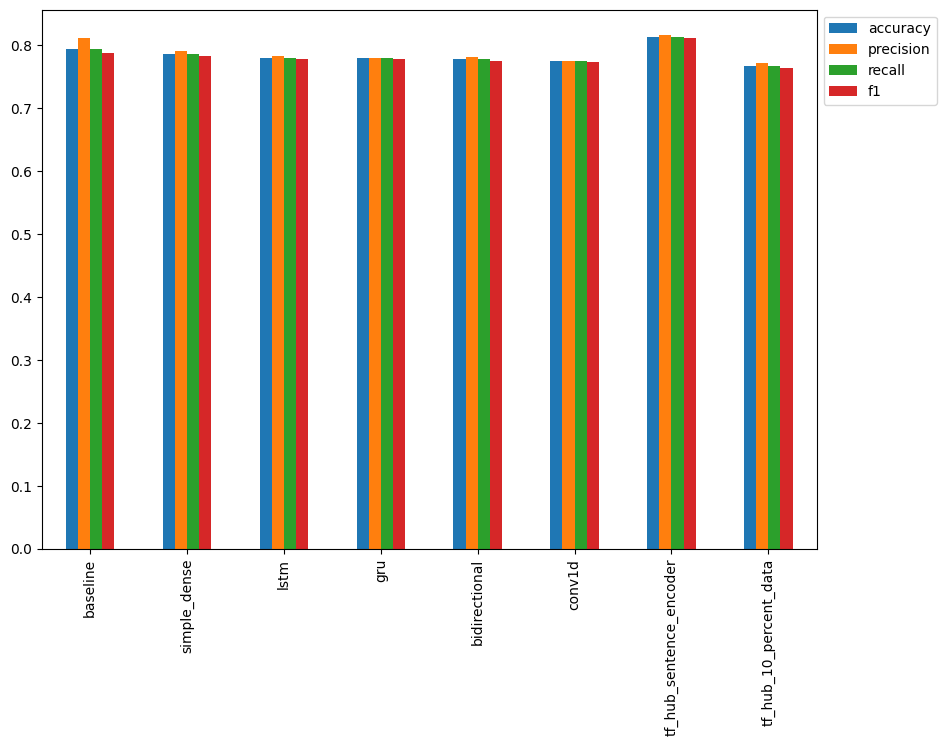

In [102]:
# Plot and compare all of the model results
all_model_results.plot(kind="bar", figsize=(10, 7)).legend(bbox_to_anchor=(1.0, 1.0));

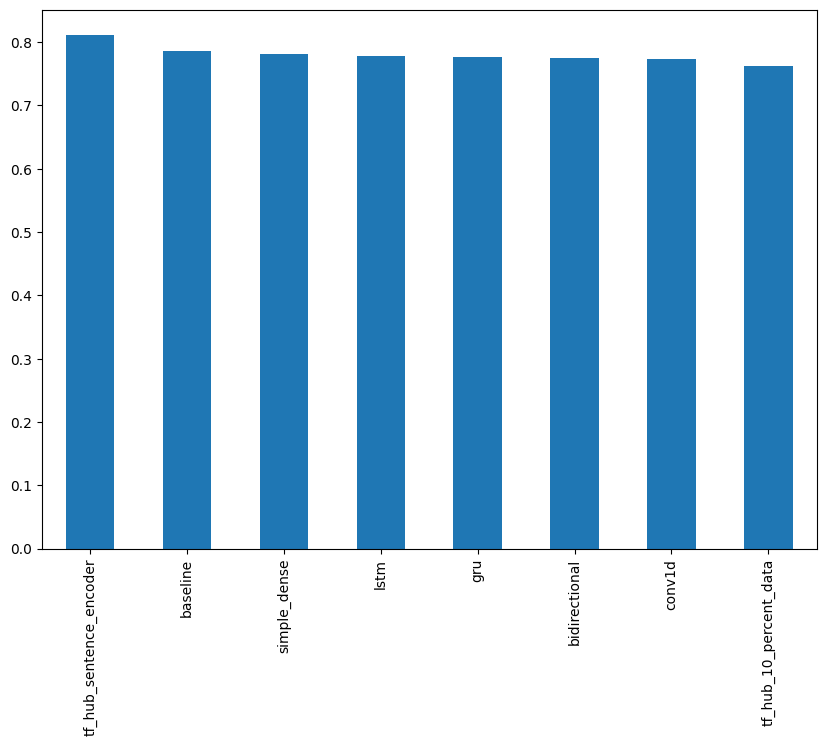

In [103]:
# Sort model results by f1-score
all_model_results.sort_values("f1", ascending=False)["f1"].plot(kind="bar", figsize=(10, 7));

In [104]:
# Get mean pred probs for 3 models
baseline_pred_probs = np.max(model_0.predict_proba(val_sentences), axis=1) # get the prediction probabilities from baseline model
combined_pred_probs = baseline_pred_probs + tf.squeeze(model_2_pred_probs, axis=1) + tf.squeeze(model_6_pred_probs)
combined_preds = tf.round(combined_pred_probs/3) # average and round the prediction probabilities to get prediction classes
combined_preds[:20]

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 0.,
       0., 0., 1.], dtype=float32)>

In [105]:
# Calculate results from averaging the prediction probabilities
ensemble_results = calculate_results(val_labels, combined_preds)
ensemble_results

{'accuracy': 80.18372703412074,
 'precision': 0.8016260299724867,
 'recall': 0.8018372703412073,
 'f1': 0.8014178750333242}

In [106]:
# Add our combined model's results to the results DataFrame
all_model_results.loc["ensemble_results"] = ensemble_results

In [107]:
# Convert the accuracy to the same scale as the rest of the results
all_model_results.loc["ensemble_results"]["accuracy"] = all_model_results.loc["ensemble_results"]["accuracy"]/100

In [108]:
all_model_results

,accuracy,precision,recall,f1
baseline,0.792651,0.811139,0.792651,0.786219
simple_dense,0.784777,0.790478,0.784777,0.781448
lstm,0.779528,0.781951,0.779528,0.777273
gru,0.778215,0.778502,0.778215,0.777048
bidirectional,0.776903,0.779882,0.776903,0.774350
conv1d,0.774278,0.774900,0.774278,0.772825
tf_hub_sentence_encoder,0.812336,0.814880,0.812336,0.810687
tf_hub_10_percent_data,0.766404,0.770808,0.766404,0.762957
ensemble_results,0.801837,0.801626,0.801837,0.801418


In [109]:
# Create dataframe with validation sentences and best performing model predictions
val_df = pd.DataFrame({"text": val_sentences,
                       "target": val_labels,
                       "pred": model_6_preds,
                       "pred_prob": tf.squeeze(model_6_pred_probs)})
val_df.head()

,text,target,pred,pred_prob
0,DFR EP016 Monthly Meltdown - On Dnbheaven 2015...,0,0.0,0.156308
1,FedEx no longer to transport bioterror germs i...,0,1.0,0.750112
2,Gunmen kill four in El Salvador bus attack: Su...,1,1.0,0.988934
3,@camilacabello97 Internally and externally scr...,1,0.0,0.184561
4,Radiation emergency #preparedness starts with ...,1,1.0,0.727437


In [110]:
# Find the wrong predictions and sort by prediction probabilities
most_wrong = val_df[val_df["target"] != val_df["pred"]].sort_values("pred_prob", ascending=False)
most_wrong[:10]

,text,target,pred,pred_prob
31,? High Skies - Burning Buildings ? http://t.co...,0,1.0,0.910031
628,@noah_anyname That's where the concentration c...,0,1.0,0.868251
759,FedEx will no longer transport bioterror patho...,0,1.0,0.852337
49,@madonnamking RSPCA site multiple 7 story high...,0,1.0,0.843828
393,@SonofLiberty357 all illuminated by the bright...,0,1.0,0.827632
209,Ashes 2015: AustraliaÛªs collapse at Trent Br...,0,1.0,0.821964
109,[55436] 1950 LIONEL TRAINS SMOKE LOCOMOTIVES W...,0,1.0,0.796729
251,@AshGhebranious civil rights continued in the ...,0,1.0,0.781841
698,åÈMGN-AFRICAå¨ pin:263789F4 åÈ Correction: Ten...,0,1.0,0.780196
144,The Sound of Arson,0,1.0,0.773165


In [111]:
# Check the false positives (model predicted 1 when should've been 0)
for row in most_wrong[:10].itertuples(): # loop through the top 10 rows (change the index to view different rows)
  _, text, target, pred, prob = row
  print(f"Target: {target}, Pred: {int(pred)}, Prob: {prob}")
  print(f"Text:\n{text}\n")
  print("----\n")

Target: 0, Pred: 1, Prob: 0.9100314378738403
Text:
? High Skies - Burning Buildings ? http://t.co/uVq41i3Kx2 #nowplaying

----

Target: 0, Pred: 1, Prob: 0.8682509064674377
Text:
@noah_anyname That's where the concentration camps and mass murder come in. 
 
EVERY. FUCKING. TIME.

----

Target: 0, Pred: 1, Prob: 0.852337121963501
Text:
FedEx will no longer transport bioterror pathogens in wake of anthrax lab mishaps http://t.co/lHpgxc4b8J

----

Target: 0, Pred: 1, Prob: 0.8438276648521423
Text:
@madonnamking RSPCA site multiple 7 story high rise buildings next to low density character residential in an area that floods

----

Target: 0, Pred: 1, Prob: 0.8276318907737732
Text:
@SonofLiberty357 all illuminated by the brightly burning buildings all around the town!

----

Target: 0, Pred: 1, Prob: 0.8219643235206604
Text:
Ashes 2015: AustraliaÛªs collapse at Trent Bridge among worst in history: England bundled out Australia for 60 ... http://t.co/t5TrhjUAU0

----

Target: 0, Pred: 1, Pro

In [112]:
# Making predictions on the test dataset
test_sentences = test_df["text"].to_list()
test_samples = random.sample(test_sentences, 10)
for test_sample in test_samples:
  pred_prob = tf.squeeze(model_6.predict([test_sample])) # has to be list
  pred = tf.round(pred_prob)
  print(f"Pred: {int(pred)}, Prob: {pred_prob}")
  print(f"Text:\n{test_sample}\n")
  print("----\n")

1/1 [==============================] - 0s 39ms/step
Pred: 1, Prob: 0.9389505982398987
Text:
#hot  C-130 specially modified to land in a stadium and rescue hostages in Iran in 1980 http://t.co/g601NBD7wS #prebreak #best

----

1/1 [==============================] - 0s 46ms/step
Pred: 0, Prob: 0.03434443473815918
Text:
@mo_ganwilson Verrry mad. like I just screamed I'm so pissed

----

1/1 [==============================] - 0s 40ms/step
Pred: 1, Prob: 0.9309700727462769
Text:
Obama Declares Disaster for Typhoon-Devastated Saipan: Obama signs disaster declaration for Northern Marians a... http://t.co/9i6CrCRq2m

----

1/1 [==============================] - 0s 49ms/step
Pred: 0, Prob: 0.06893078237771988
Text:
If you like rock music you should care about 5 Seconds Of Summer. HereÛªs why. paper-storm: I am a fan of Au Û_ http://t.co/eqEeUVpRQQ

----

1/1 [==============================] - 0s 39ms/step
Pred: 0, Prob: 0.09588984400033951
Text:
http://t.co/3d2h2wOQwa NEW! DIESEL WILLYT Print

##Prediciting on new tweets

In [113]:
# Turn Tweet into string
daniels_tweet = "Life like an ensemble: take the best choices from others and make your own"

In [114]:
def predict_on_sentence(model, sentence):
  """
  Uses model to make a prediction on sentence.

  Returns the sentence, the predicted label and the prediction probability.
  """
  pred_prob = model.predict([sentence])
  pred_label = tf.squeeze(tf.round(pred_prob)).numpy()
  print(f"Pred: {pred_label}", "(real disaster)" if pred_label > 0 else "(not real disaster)", f"Prob: {pred_prob[0][0]}")
  print(f"Text:\n{sentence}")

In [115]:
# Make a prediction on Tweet from the wild
predict_on_sentence(model=model_6, # use the USE model
                    sentence=daniels_tweet)

1/1 [==============================] - 0s 42ms/step
Pred: 0.0 (not real disaster) Prob: 0.04661007970571518
Text:
Life like an ensemble: take the best choices from others and make your own


In [116]:
# Source - https://twitter.com/BeirutCityGuide/status/1290696551376007168
beirut_tweet_1 = "Reports that the smoke in Beirut sky contains nitric acid, which is toxic. Please share and refrain from stepping outside unless urgent. #Lebanon"

# Source - https://twitter.com/BeirutCityGuide/status/1290773498743476224
beirut_tweet_2 = "#Beirut declared a “devastated city”, two-week state of emergency officially declared. #Lebanon"

In [117]:
# Predict on diaster Tweet 1
predict_on_sentence(model=model_6,
                    sentence=beirut_tweet_1)

1/1 [==============================] - 0s 48ms/step
Pred: 1.0 (real disaster) Prob: 0.9608811736106873
Text:
Reports that the smoke in Beirut sky contains nitric acid, which is toxic. Please share and refrain from stepping outside unless urgent. #Lebanon


In [118]:
# Predict on diaster Tweet 2
predict_on_sentence(model=model_6,
                    sentence=beirut_tweet_2)

1/1 [==============================] - 0s 37ms/step
Pred: 1.0 (real disaster) Prob: 0.971673846244812
Text:
#Beirut declared a “devastated city”, two-week state of emergency officially declared. #Lebanon
